### Set up environment and import from SQLite

In [1]:
import pandas as pd
import numpy as np
import datetime
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [606]:
import matplotlib.patches as mpatches

In [2]:
pd.set_option('display.float_format', '{:,.0f}'.format)

In [3]:
dbengine = create_engine("sqlite:///mta.db")

In [4]:
sql = """
SELECT t.* 
FROM mta_data t INNER JOIN stations_mapping s
on t.station = s.station_new
WHERE s.borough = 'Q'
"""

mta = pd.read_sql(sql, dbengine)

In [5]:
mta.head()

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,R529,R208,00-00-00,103 ST-CORONA,7,IRT,01/01/2021,03:00:00,REGULAR,16301866,25806745
1,R529,R208,00-00-00,103 ST-CORONA,7,IRT,01/01/2021,07:00:00,REGULAR,16301912,25806776
2,R529,R208,00-00-00,103 ST-CORONA,7,IRT,01/01/2021,11:00:00,REGULAR,16302069,25806888
3,R529,R208,00-00-00,103 ST-CORONA,7,IRT,01/01/2021,15:00:00,REGULAR,16302205,25807127
4,R529,R208,00-00-00,103 ST-CORONA,7,IRT,01/01/2021,19:00:00,REGULAR,16302312,25807604


In [6]:
mta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080096 entries, 0 to 1080095
Data columns (total 11 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   CA        1080096 non-null  object
 1   UNIT      1080096 non-null  object
 2   SCP       1080096 non-null  object
 3   STATION   1080096 non-null  object
 4   LINENAME  1080096 non-null  object
 5   DIVISION  1080096 non-null  object
 6   DATE      1080096 non-null  object
 7   TIME      1080096 non-null  object
 8   DESC      1080096 non-null  object
 9   ENTRIES   1080096 non-null  int64 
 10  EXITS     1080096 non-null  int64 
dtypes: int64(2), object(9)
memory usage: 90.6+ MB


In [7]:
mta.columns


Index(['CA', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [28]:
mta.STATION.unique().size

74

In [52]:
mta.STATION.unique()

array(['103 ST-CORONA', '104 ST', '111 ST', '121 ST', '169 ST', '21 ST',
       '21 ST-QNSBRIDGE', '30 AV', '33 ST-RAWSON ST', '36 AV', '36 ST',
       '39 AV', '40 ST LOWERY ST', '46 ST', '46 ST BLISS ST', '52 ST',
       '63 DR-REGO PARK', '65 ST', '67 AV', '69 ST', '74 ST-BROADWAY',
       '75 AV', '75 ST-ELDERTS', '80 ST', '82 ST-JACKSON H',
       '85 ST-FOREST PK', '88 ST', '90 ST-ELMHURST', 'AQUEDUCT RACETR',
       'ASTORIA BLVD', 'ASTORIA DITMARS', 'BEACH 105 ST', 'BEACH 25 ST',
       'BEACH 36 ST', 'BEACH 44 ST', 'BEACH 60 ST', 'BEACH 67 ST',
       'BEACH 90 ST', 'BEACH 98 ST', 'BRIARWOOD', 'BROAD CHANNEL',
       'BROADWAY', 'COURT SQ', 'COURT SQ-23 ST', 'ELMHURST AV',
       'FAR ROCKAWAY', 'FLUSHING-MAIN', 'FOREST AVE', 'FOREST HILLS 71',
       'FRESH POND RD', 'GRAND-NEWTOWN', 'HALSEY ST', 'HOWARD BCH JFK',
       'HUNTERS PT AV', 'JKSN HT-ROOSVLT', 'JAMAICA CENTER',
       'JAMAICA 179 ST', 'JAMAICA VAN WK', 'JUNCTION BLVD', 'KEW GARDENS',
       'METS-WILLETS PT', 'N

In [ ]:
mta.describe()

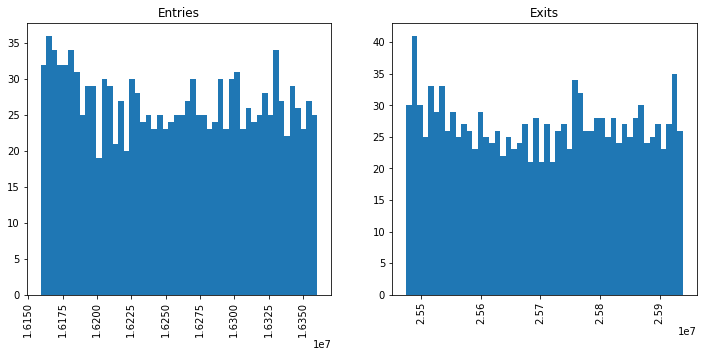

In [828]:

mask = ((mta['CA'] == 'R529') &
        (mta['UNIT'] == 'R208') &
        (mta['SCP'] == '00-00-00') &
        (mta['STATION'] == '103 ST-CORONA'))
    
plt.figure(figsize=(12,5))

#plt.suptitle("Histogram of ENTRIES and EXITS")

plt.subplot(1,2,1)    
plt.title('Entries')    
plt.hist(mta[mask].ENTRIES,50)
plt.xticks(rotation=90)
    
plt.subplot(1,2,2)    
plt.title('Exits')    
plt.hist(mta[mask].EXITS,50)
plt.xticks(rotation=90);

plt.savefig('histEnEX-Corona.png')


#### Column name issues to remove:
- 'C/A' easier to work with as CA
- 'Exists ...blanks...' need to remove trailing blanks

In [ ]:
#Not needed as we are importing from db

#mta.columns = mta.columns.str.strip()
#mta.rename(columns = {'C/A':'CA'}, inplace=True)
#mta.columns

In [ ]:
#mta.DATE.unique()

#### Does the data have any duplicate rows?

In [ ]:
#No NN count of differing names - probably okay

mta.STATION.value_counts()

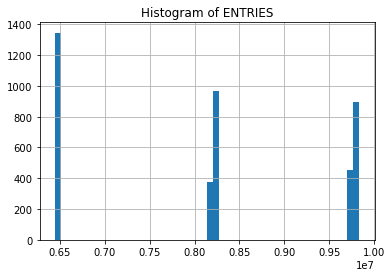

In [829]:
#STATION ENTRY analysis
plt.hist(mta.ENTRIES[mta.STATION == '65 ST'], bins=50)

plt.title("Histogram of ENTRIES");

mta

# plt.ylim((0,10000))
plt.grid()

In [ ]:
mta.ENTRIES[mta.STATION == '65 ST']

In [ ]:

plt.hist(mta.EXITS, bins=100)

plt.title("Histogram of EXITS");

plt.ylim((0,10000))
plt.yticks()

In [ ]:
mask = mta.groupby(["CA", "UNIT", "SCP", "STATION", "DATE", "TIME"], as_index=False)["ENTRIES"].count().sort_values("ENTRIES", ascending=False)
mask[mask.ENTRIES > 1].count().max()
# YEs

In [ ]:
rows_before = len(mta)
mta.drop_duplicates(subset=["CA", "UNIT", "SCP", "STATION", "DATE", "TIME"], inplace=True)
rows_after = len(mta)
print("Rows before: {} \nRows after: {} \nRows dropped: {}".format(rows_before, rows_after, rows_before - rows_after))

In [ ]:
any(mta.ENTRIES.isna())

In [ ]:
plt.figure(figsize=(5,10))

## Get the Average Entries Exits by Turnstile
mta['AVG_ENTRIES'] = mta.groupby(["CA", "UNIT", "SCP"])['ENTRIES'].transform(lambda x:np.mean(x))
mta['AVG_EXITS'] = mta.groupby(["CA", "UNIT", "SCP"])['EXITS'].transform(lambda x:np.mean(x))
mta['ENTRY_DIFF'] = mta['ENTRIES'] - mta['AVG_ENTRIES']
mta['EXIT_DIFF'] = mta['EXITS'] - mta['AVG_EXITS']
pd.concat([mta.head(),mta.tail()])

In [ ]:
dd = mta[mta.STATION == '61 ST WOODSIDE'].groupby(["CA", "UNIT", "SCP"])

In [ ]:
dd.ngroups

In [ ]:
mta.ENTRIES.values.


In [797]:

plt.figure(figsize=(5,12))
mta["DATETIME"] = pd.to_datetime(mta.DATE + " " + mta.TIME)

mta.sort_values(["CA", "UNIT", "SCP", "DATETIME"], inplace=True)

station = '61 ST WOODSIDE'
ngroups = mta[mta.STATION == '61 ST WOODSIDE'].groupby(["CA", "UNIT", "SCP"]).ngroups
i = 1
plt.suptitle(f"Station : {station}  ENTRIES" )
for name, obj in mta[mta.STATION == '61 ST WOODSIDE'].groupby(["CA", "UNIT", "SCP"]):    
    plt.subplot(ngroups, 1, i)
    i += 1
    plt.title(f'Turnstile: {name}')
    plt.plot(obj['DATETIME'], obj["ENTRIES"], label=name);
    
plt.savefig('woodside turnstile ENTRIES.png')    
    

TypeError: 'str' object is not callable

<Figure size 360x864 with 0 Axes>

In [796]:

turnstats = mta.groupby(["CA", "UNIT", "SCP", "STATION"]).apply(lambda x:x.describe())

#### Add datetime column for ordering

In [ ]:
mta["DATETIME"] = pd.to_datetime(mta.DATE + " " + mta.TIME)
mta.head()

In [ ]:
mta.sort_values(['CA', 'UNIT', 'SCP', 'STATION', 'DATETIME'], ascending=True, inplace=True)

In [ ]:
mta.head(10)

In [412]:
#Group daily entries by turnstile
mta_daily = mta.groupby(['CA', 'UNIT', 'SCP', 'STATION','DATE'], as_index=False)[['ENTRIES','EXITS']].last()
mta_daily

,CA,UNIT,SCP,STATION,DATE,ENTRIES,EXITS
0,C018,R197,00-00-00,36 ST,01/01/2021,70779,110903
1,C018,R197,00-00-00,36 ST,01/02/2021,71725,112403
2,C018,R197,00-00-00,36 ST,01/03/2021,72546,113531
3,C018,R197,00-00-00,36 ST,01/04/2021,73851,115475
4,C018,R197,00-00-00,36 ST,01/05/2021,75250,117497
...,...,...,...,...,...,...,...
172657,R534,R055,01-05-01,FLUSHING-MAIN,12/27/2020,458753,722
172658,R534,R055,01-05-01,FLUSHING-MAIN,12/28/2020,458753,722
172659,R534,R055,01-05-01,FLUSHING-MAIN,12/29/2020,458753,722
172660,R534,R055,01-05-01,FLUSHING-MAIN,12/30/2020,458753,722


# Check:

Confirm that mta_daly dataframe is pulling in the latest ENTRY time for each group 

In [413]:
station = (mta.CA == 'C018') & \
          (mta.UNIT == 'R197') & \
          (mta.SCP == '00-00-00') & \
          (mta.DATE.isin(["12/13/2020"]))

stationDaily = (mta_daily.CA == 'C018') & \
          (mta_daily.UNIT == 'R197') & \
          (mta_daily.SCP == '00-00-00') & \
          (mta_daily.DATE.isin(["12/13/2020"]))


print("MTA")
print(mta.loc[station, :])

print("MTA_daily")
print(mta_daily.loc[stationDaily, :])

MTA
          CA  UNIT       SCP STATION LINENAME DIVISION        DATE      TIME  \
120542  C018  R197  00-00-00   36 ST      DNR      BMT  12/13/2020  00:00:00   
120543  C018  R197  00-00-00   36 ST      DNR      BMT  12/13/2020  04:00:00   
120544  C018  R197  00-00-00   36 ST      DNR      BMT  12/13/2020  08:00:00   
120545  C018  R197  00-00-00   36 ST      DNR      BMT  12/13/2020  12:00:00   
120546  C018  R197  00-00-00   36 ST      DNR      BMT  12/13/2020  16:00:00   
120547  C018  R197  00-00-00   36 ST      DNR      BMT  12/13/2020  20:00:00   

           DESC  ENTRIES  EXITS  
120542  REGULAR    48212  73623  
120543  REGULAR    48217  73744  
120544  REGULAR    48279  73892  
120545  REGULAR    48494  74205  
120546  REGULAR    48748  74637  
120547  REGULAR    49039  75112  
MTA_daily
       CA  UNIT       SCP STATION        DATE  ENTRIES  EXITS
205  C018  R197  00-00-00   36 ST  12/13/2020    49039  75112


### Adding exit data

In [414]:
mta_daily[['PREV_DATE','PREV_ENTRIES']] = mta_daily.groupby(['CA', 'UNIT', 'SCP', 'STATION'])[["DATE","ENTRIES"]].shift(1)
mta_daily[['PREV_EXITS']] = mta_daily.groupby(['CA', 'UNIT', 'SCP', 'STATION'])[["EXITS"]].shift(1)
mta_daily.head()

,CA,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS
0,C018,R197,00-00-00,36 ST,01/01/2021,70779,110903,NaN,NaN,NaN
1,C018,R197,00-00-00,36 ST,01/02/2021,71725,112403,01/01/2021,"70,779","110,903"
2,C018,R197,00-00-00,36 ST,01/03/2021,72546,113531,01/02/2021,"71,725","112,403"
3,C018,R197,00-00-00,36 ST,01/04/2021,73851,115475,01/03/2021,"72,546","113,531"
4,C018,R197,00-00-00,36 ST,01/05/2021,75250,117497,01/04/2021,"73,851","115,475"


### Dropping the NA rows created by using .shift()

In [415]:
#Drop NaN entries
rows_before = len(mta_daily)
mta_daily.dropna(subset=['PREV_ENTRIES'], inplace=True)
rows_after = len(mta_daily)
print("Rows before: {} \nRows after: {} \nRows dropped: {}".format(rows_before, rows_after, rows_before - rows_after))

Rows before: 172662 
Rows after: 171878 
Rows dropped: 784


In [416]:
#Drop NaN exits
rows_before = len(mta_daily)
mta_daily.dropna(subset=['PREV_EXITS'], inplace=True)
rows_after = len(mta_daily)
print("Rows before: {} \nRows after: {} \nRows dropped: {}".format(rows_before, rows_after, rows_before - rows_after))

Rows before: 171878 
Rows after: 171878 
Rows dropped: 0


In [750]:
#mta_daily.sample(50)
mta_daily.head()

,CA,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,...,DAILY_ACTION,AVG_DAILY_ENTRIES,AVG_DAILY_EXITS,DATETIME,WeekYear,WEEKDAY,WEEKOFYEAR,WEEKYEAR,HOLIDAY,RANK
33690,N192,R336,00-00-01,BEACH 60 ST,11/16/2020,35,10,11/15/2020,"12,387","16,374",...,12629,"3,596",278,2020-11-16,47,0,47,47,,"6,774"
168394,R533,R055,00-00-05,FLUSHING-MAIN,09/12/2020,273,551,09/11/2020,"658,533","7,695",...,7316,"6,324",994,2020-09-12,37,5,37,37,,"7,948"
168385,R533,R055,00-00-05,FLUSHING-MAIN,09/03/2020,655577,604,09/02/2020,"10,696,562","15,011,153",...,6927,"6,324",994,2020-09-03,36,3,36,36,,"55,202"
167109,R532H,R328,02-06-01,METS-WILLETS PT,11/10/2020,589824,4,11/09/2020,"33,256","345,441",...,7712,"4,758","2,954",2020-11-10,46,1,46,46,,"51,714"
166990,R532H,R328,02-06-00,METS-WILLETS PT,11/10/2020,524288,0,11/09/2020,"41,929","338,430",...,7019,"4,126","2,894",2020-11-10,46,1,46,46,,"48,789"


In [418]:
#Defining action as entries + exits
fmta_daily['DAILY_ENTRIES'] = mta_daily['ENTRIES'] - mta_daily['PREV_ENTRIES']
mta_daily['DAILY_EXITS'] = mta_daily['EXITS'] - mta_daily['PREV_EXITS']
mta_daily['DAILY_ACTION'] = mta_daily['DAILY_ENTRIES'] + mta_daily['DAILY_EXITS']
mta_daily.head()

,CA,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DAILY_EXITS,DAILY_ACTION
1,C018,R197,00-00-00,36 ST,01/02/2021,71725,112403,01/01/2021,"70,779","110,903",946,"1,500","2,446"
2,C018,R197,00-00-00,36 ST,01/03/2021,72546,113531,01/02/2021,"71,725","112,403",821,"1,128","1,949"
3,C018,R197,00-00-00,36 ST,01/04/2021,73851,115475,01/03/2021,"72,546","113,531","1,305","1,944","3,249"
4,C018,R197,00-00-00,36 ST,01/05/2021,75250,117497,01/04/2021,"73,851","115,475","1,399","2,022","3,421"
5,C018,R197,00-00-00,36 ST,01/06/2021,76587,119549,01/05/2021,"75,250","117,497","1,337","2,052","3,389"


In [419]:
# remove erroneous rows
mask = (mta_daily.PREV_DATE == '03/05/2021')

# mta_daily[mask].index
mta_daily.drop(index=mta_daily[mask].index, inplace=True)

In [ ]:
tempgrp = mta_daily.groupby(['CA', 'UNIT', 'SCP', 'STATION'])[['ENTRIES','EXITS']].

## First pass fixing Entries and exits

In [422]:
def get_daily_counts(row, col, prev_col, max_counter):
    counter = row[col] - row[prev_col]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        (print("DATE: {} STATION: {} {}: {} {}: {} DIFFERENCE: {}"
               .format(row["DATE"], row["STATION"], col, row[col], prev_col, row[prev_col], counter)))
        counter = min(row[col], row[prev_col])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return int(counter)

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit

In [423]:
mta_daily["DAILY_ENTRIES"] = mta_daily.apply(get_daily_counts, axis=1, col='ENTRIES', prev_col='PREV_ENTRIES', max_counter=1000000)
#mta_daily["DAILY_EXITS"] = mta_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

DATE: 11/05/2020 STATION: 36 ST ENTRIES: 1294 PREV_ENTRIES: 6496220.0 DIFFERENCE: 6494926.0
DATE: 09/18/2020 STATION: HALSEY ST ENTRIES: 590069 PREV_ENTRIES: 1906617.0 DIFFERENCE: 1316548.0
DATE: 11/02/2020 STATION: HALSEY ST ENTRIES: 157 PREV_ENTRIES: 3563454.0 DIFFERENCE: 3563297.0
DATE: 08/27/2020 STATION: WOODHAVEN BLVD ENTRIES: 279 PREV_ENTRIES: 8291685.0 DIFFERENCE: 8291406.0
DATE: 10/04/2020 STATION: FRESH POND RD ENTRIES: 63 PREV_ENTRIES: 1074082.0 DIFFERENCE: 1074019.0
DATE: 08/31/2020 STATION: BEACH 60 ST ENTRIES: 278 PREV_ENTRIES: 5239290.0 DIFFERENCE: 5239012.0
DATE: 11/19/2020 STATION: BEACH 60 ST ENTRIES: 318 PREV_ENTRIES: 3251529.0 DIFFERENCE: 3251211.0
DATE: 12/06/2020 STATION: BEACH 25 ST ENTRIES: 81 PREV_ENTRIES: 644689531.0 DIFFERENCE: 644689450.0
DATE: 11/28/2020 STATION: JKSN HT-ROOSVLT ENTRIES: 35 PREV_ENTRIES: 3732118.0 DIFFERENCE: 3732083.0
DATE: 02/26/2021 STATION: JKSN HT-ROOSVLT ENTRIES: 702 PREV_ENTRIES: 3651815.0 DIFFERENCE: 3651113.0
DATE: 02/03/2021 STATI

In [424]:
mta_daily["DAILY_EXITS"] = (mta_daily.apply(get_daily_counts, axis=1, col='EXITS', prev_col='PREV_EXITS',
                                            max_counter=1000000))

DATE: 11/05/2020 STATION: 36 ST EXITS: 1866 PREV_EXITS: 8290526.0 DIFFERENCE: 8288660.0
DATE: 11/02/2020 STATION: HALSEY ST EXITS: 237 PREV_EXITS: 1855382.0 DIFFERENCE: 1855145.0
DATE: 08/27/2020 STATION: WOODHAVEN BLVD EXITS: 498 PREV_EXITS: 5618421.0 DIFFERENCE: 5617923.0
DATE: 12/10/2020 STATION: HOWARD BCH JFK EXITS: 4264025 PREV_EXITS: 69694.0 DIFFERENCE: 4194331.0
DATE: 12/11/2020 STATION: HOWARD BCH JFK EXITS: 69754 PREV_EXITS: 4264025.0 DIFFERENCE: 4194271.0
DATE: 08/31/2020 STATION: BEACH 60 ST EXITS: 223 PREV_EXITS: 5547055.0 DIFFERENCE: 5546832.0
DATE: 11/19/2020 STATION: BEACH 60 ST EXITS: 170 PREV_EXITS: 1973800.0 DIFFERENCE: 1973630.0
DATE: 12/06/2020 STATION: BEACH 25 ST EXITS: 93 PREV_EXITS: 968396197.0 DIFFERENCE: 968396104.0
DATE: 11/28/2020 STATION: JKSN HT-ROOSVLT EXITS: 23 PREV_EXITS: 2858888.0 DIFFERENCE: 2858865.0
DATE: 02/26/2021 STATION: JKSN HT-ROOSVLT EXITS: 968 PREV_EXITS: 3630202.0 DIFFERENCE: 3629234.0
DATE: 02/03/2021 STATION: JKSN HT-ROOSVLT EXITS: 1983 

In [425]:
# mask = (mta_daily.STATION == "FLUSHING-MAIN") & (mta_daily.DATE.between("09/03/2020", "09/04/2020"))

mask = ((mta_daily.STATION == "FLUSHING-MAIN") & 
        (mta_daily.DATE.between("09/01/2020", "09/08/2020")) &
        (mta_daily.SCP == '00-00-05'))

                                        

In [751]:
mta_daily["AVG_DAILY_ENTRIES"] = (mta_daily.groupby(['CA','UNIT','SCP','STATION'])['DAILY_ENTRIES']
                                  .transform(np.mean))
mta_daily["AVG_DAILY_EXITS"] = (mta_daily.groupby(['CA','UNIT','SCP','STATION'])['DAILY_EXITS']
                                  .transform(np.mean))

mta_daily.head()

,CA,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,...,DAILY_ACTION,AVG_DAILY_ENTRIES,AVG_DAILY_EXITS,DATETIME,WeekYear,WEEKDAY,WEEKOFYEAR,WEEKYEAR,HOLIDAY,RANK
33690,N192,R336,00-00-01,BEACH 60 ST,11/16/2020,35,10,11/15/2020,"12,387","16,374",...,12629,260,203,2020-11-16,47,0,47,47,,"6,774"
168394,R533,R055,00-00-05,FLUSHING-MAIN,09/12/2020,273,551,09/11/2020,"658,533","7,695",...,7316,463,966,2020-09-12,37,5,37,37,,"7,948"
168385,R533,R055,00-00-05,FLUSHING-MAIN,09/03/2020,655577,604,09/02/2020,"10,696,562","15,011,153",...,6927,463,966,2020-09-03,36,3,36,36,,"55,202"
167109,R532H,R328,02-06-01,METS-WILLETS PT,11/10/2020,589824,4,11/09/2020,"33,256","345,441",...,7712,42,27,2020-11-10,46,1,46,46,,"51,714"
166990,R532H,R328,02-06-00,METS-WILLETS PT,11/10/2020,524288,0,11/09/2020,"41,929","338,430",...,7019,38,26,2020-11-10,46,1,46,46,,"48,789"


## Decided to fix out of bounds daily entries and exits by substituting for the mean of the group

In [427]:
def fix_entries(row, mult):
    if row["DAILY_ENTRIES"] > row["AVG_DAILY_ENTRIES"] * mult:
        return int(row["AVG_DAILY_ENTRIES"])
    else:
        return int(row["DAILY_ENTRIES"])
    
    
mta_daily['DAILY_ENTRIES'] = mta_daily.apply(fix_entries, mult = 5, axis=1)


In [428]:
def fix_exits(row, mult):
    if row["DAILY_EXITS"] > row["AVG_DAILY_EXITS"] * mult:
        return int(row["AVG_DAILY_EXITS"])
    else:
        return int(row["DAILY_EXITS"])
    
    
mta_daily['DAILY_EXITS'] = mta_daily.apply(fix_exits, mult = 5, axis=1)


In [429]:
mta_daily['DAILY_ACTION'] = mta_daily['DAILY_ENTRIES'] + mta_daily['DAILY_EXITS']

In [ ]:
mta_daily.head()

In [800]:
turnstiles_daily = mta_daily.groupby(['CA','UNIT','SCP','STATION','DATE'])['DAILY_ENTRIES'].sum().reset_index()
turnstiles_daily

,CA,UNIT,SCP,STATION,DATE,DAILY_ENTRIES
0,C018,R197,00-00-00,36 ST,01/02/2021,946
1,C018,R197,00-00-00,36 ST,01/03/2021,821
2,C018,R197,00-00-00,36 ST,01/04/2021,1305
3,C018,R197,00-00-00,36 ST,01/05/2021,1399
4,C018,R197,00-00-00,36 ST,01/06/2021,1337
...,...,...,...,...,...,...
171100,R534,R055,01-05-01,FLUSHING-MAIN,12/27/2020,0
171101,R534,R055,01-05-01,FLUSHING-MAIN,12/28/2020,0
171102,R534,R055,01-05-01,FLUSHING-MAIN,12/29/2020,0
171103,R534,R055,01-05-01,FLUSHING-MAIN,12/30/2020,0


In [810]:
#Compile station statistics

#pick a date
datemask = turnstiles_daily.DATE == '01/30/2021'


stats_df = (turnstiles_daily[datemask].groupby(['STATION'])[['SCP']]
            .count()
            .sort_values(['SCP'],ascending=False)
            .reset_index())

stats_df.rename(columns={"SCP":"Most Turnstiles"}, inplace=True)
stats_df.set_index("STATION", inplace=True)

stats_df.head(10)

stats_df.head(10).to_clipboard()

In [811]:
#sanity check - display all the turnstiles for 

turnstiles_daily[(turnstiles_daily.DATE == '01/30/2021') & (turnstiles_daily.STATION == '34 ST-PENN STA')]



,CA,UNIT,SCP,STATION,DATE,DAILY_ENTRIES


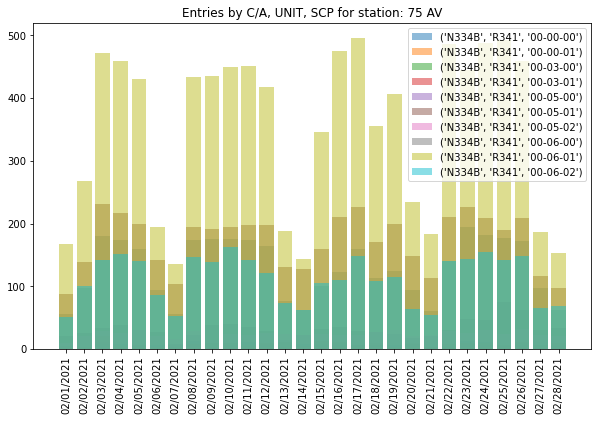

In [823]:
plt.figure(figsize=(10,6))

station = '75 AV'
#station = '34 ST-PENN STA'
dt_start = pd.to_datetime("02/01/2021")
dt_end = pd.to_datetime("02/28/2021")
dt_start = "02/01/2021"
dt_end = "02/28/2021"

filter23 = (turnstiles_daily.STATION == station) & (turnstiles_daily.DATE.between(dt_start, dt_end))

for name, obj in turnstiles_daily[filter23].groupby(['CA', 'UNIT', 'SCP']):
    plt.bar(x=obj["DATE"], height=obj['DAILY_ENTRIES'], label = name, alpha=0.5)

plt.title("Entries by C/A, UNIT, SCP for station: {}".format(station))
plt.xticks(rotation=90)    
plt.legend(loc="best");
#plt.legend()    
#mta_daily[filter23]
#plt.bar(x=mta_daily[filter23].DATE, height=mta_daily[filter23].ENTRIES)

plt.savefig('turnstile75.png')

In [ ]:
turnstiles_daily[filter23]

In [ ]:
datemask = mta_daily.DATE == '02/25/2021'
stations_daily = (mta_daily[datemask].groupby(['STATION', 'DATE'])[['DAILY_ENTRIES']]
                  .sum()
                  .reset_index()
                  .sort_values(['DAILY_ENTRIES'], ascending=False))
stations_daily["Weekday"] = pd.to_datetime(stations_daily.DATE).dt.day_name()
stations_daily.head(25)

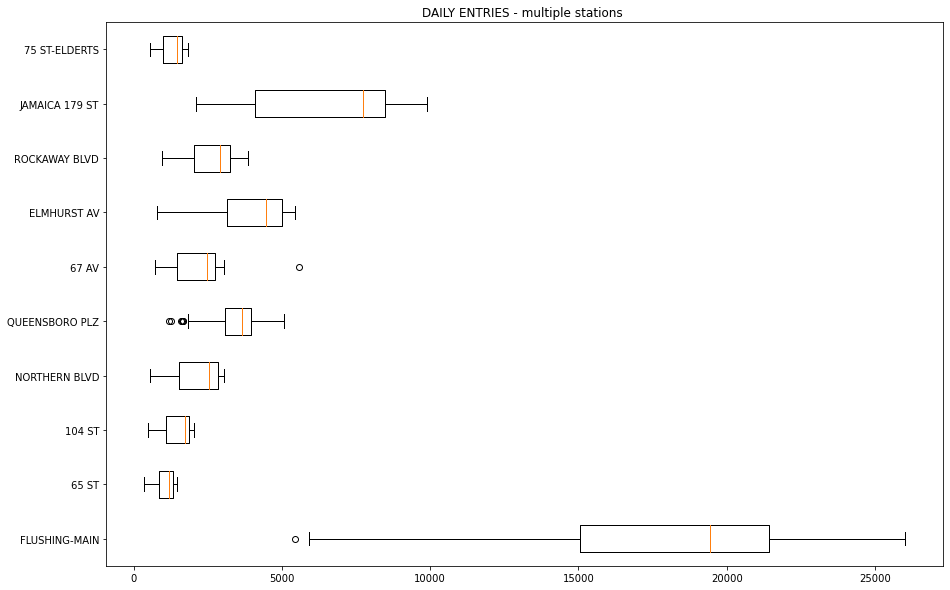

In [851]:
import seaborn as sns
plt.figure(figsize=(15,10))
#x=stations_daily.DAILY_ENTRIES.values
#sns.boxplot(data=x)
#stations_daily[stations_daily.STATION.isin(['71 ST','36 ST'])].boxplot(column='DAILY_ENTRIES',by = "STATION")
plt.title("DAILY ENTRIES - multiple stations ");

pltx = []
lbl = []
for stationname in stations_daily.STATION.unique()[:10]:
    x1 = stations_daily[stations_daily.STATION == stationname].DAILY_ENTRIES.values
    pltx.append(x1)
    lbl.append(stationname)
    
plt.boxplot(pltx, labels=lbl, vert=False);

#stations_daily.DAILY_ENTRIES

plt.savefig('boxplots1.png')

In [ ]:
stations = ['59 ST','23 ST','34 ST-PENN STA']

#plt.subplot(1,3,1)
plt.figure(figsize=(5,10))
for i, station in enumerate(stations):
    plt.subplot(len(stations),1,i+1)
    mask = stations_daily.STATION == station
    print(stations_daily[mask].DAILY_ENTRIES.values)
    sns.boxplot(x=stations_daily[mask].DAILY_ENTRIES) #, labels=[station])


In [ ]:
mta_daily[mta_daily.PREV_ENTRIES.isna()]


#### Distribution of first and last turnstile readings each day

In [753]:
daystart = (mta.groupby(['CA','UNIT','SCP', 'STATION'], as_index=False)[['DATETIME','TIME','ENTRIES']].first()
            .TIME.value_counts())
#daystart

dayend = (mta.groupby(['CA','UNIT','SCP', 'STATION'], as_index=False)[['DATETIME','TIME','ENTRIES']].last()
            .TIME.value_counts())
dayend

23:00:00    486
20:00:00    268
21:30:00     11
22:04:22      9
19:00:00      5
08:00:00      3
11:00:00      1
09:00:00      1
Name: TIME, dtype: int64

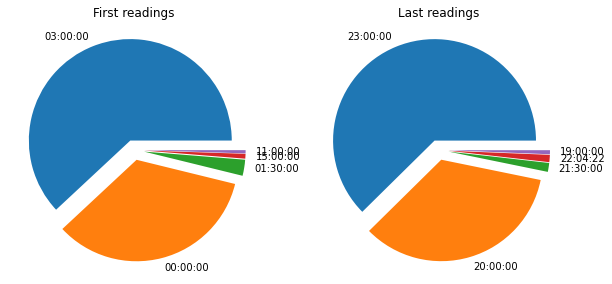

In [771]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.pie(daystart[:5], labels =daystart.index[:5], explode =[.1] *5 );
plt.title("First readings")
plt.subplot(1,2,2)
plt.pie(dayend[:5], labels =dayend.index[:5], explode =[.1] *5);
plt.title("Last readings")
#plt.suptitle("Turnstile time of day readings");
plt.savefig('meterreadings.png');

In [ ]:
stationx = mta[station].copy()

In [ ]:
stationx.sort_values('datetime', ascending=True, inplace=True)

In [ ]:
station

In [ ]:
stationx[["PREV_DATE", "PREV_ENTRIES"]] = (stationx
                                           .groupby(["CA", "UNIT", "SCP", "STATION"])[["DATE", "ENTRIES"]]
                                           .apply(lambda grp: grp.shift(1)))

In [ ]:
stationx


In [ ]:
station = (mta_daily.STATION == 'FLUSHING-MAIN')

In [ ]:
mta_daily[station].

In [86]:
mta_daily.columns

Index(['CA', 'UNIT', 'SCP', 'STATION', 'DATE', 'ENTRIES', 'EXITS', 'PREV_DATE',
       'PREV_ENTRIES', 'PREV_EXITS', 'DAILY_ENTRIES', 'DAILY_EXITS',
       'DAILY_ACTION', 'AVG_DAILY_ENTRIES', 'AVG_DAILY_EXITS'],
      dtype='object')

In [74]:
mta_daily.head()

,CA,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DAILY_EXITS,DAILY_ACTION,AVG_DAILY_ENTRIES,AVG_DAILY_EXITS
1,C018,R197,00-00-00,36 ST,01/02/2021,71725,112403,01/01/2021,"70,779","110,903",946,1500,2446,"1,251","1,752"
2,C018,R197,00-00-00,36 ST,01/03/2021,72546,113531,01/02/2021,"71,725","112,403",821,1128,1949,"1,251","1,752"
3,C018,R197,00-00-00,36 ST,01/04/2021,73851,115475,01/03/2021,"72,546","113,531",1305,1944,3249,"1,251","1,752"
4,C018,R197,00-00-00,36 ST,01/05/2021,75250,117497,01/04/2021,"73,851","115,475",1399,2022,3421,"1,251","1,752"
5,C018,R197,00-00-00,36 ST,01/06/2021,76587,119549,01/05/2021,"75,250","117,497",1337,2052,3389,"1,251","1,752"


In [134]:
station_totals = (mta_daily.groupby(['STATION'])[['DAILY_ENTRIES']].mean()
                  .reset_index()
                  .sort_values('DAILY_ENTRIES', ascending=False))
    
station_totals.rename(columns={'DAILY_ENTRIES': 'AVG_DAILY_ENTRIES'}, inplace = True)    
    
jan2021 = (mta_daily[mta_daily.DATE.between('01/01/2021', '01/31/2021')]
                    .groupby(['STATION'])[['DAILY_ENTRIES']].sum()
                    .rename(columns={'DAILY_ENTRIES' : 'JAN 2021'})
                    .reset_index()
                    .sort_values('STATION', ascending=True))
    
oct2020 = (mta_daily[mta_daily.DATE.between('10/01/2020', '10/31/2021')]
                    .groupby(['STATION'])[['DAILY_ENTRIES']].sum()
                    .rename(columns={'DAILY_ENTRIES' : 'OCT 2020'})
                    .reset_index()
                    .sort_values('STATION', ascending=True))

    
oct2020.sort_values('OCT 2020', ascending=False, inplace=True)
    
#jan2021
#station_totals

In [244]:
from datetime import datetime
from calendar import monthrange

station_totals = (mta_daily.groupby(['STATION'])[['DAILY_ENTRIES']].mean()
                  .reset_index()
                  .sort_values('DAILY_ENTRIES', ascending=False))
    
station_totals.rename(columns={'DAILY_ENTRIES': 'AVG_DAILY_ENTRIES'}, inplace = True)    
    
df_months = []

#2020
for month in [9,10,11,12]:    
    mstart = datetime(2020, month, 1)
    mend =  datetime(2020,month, monthrange(2020,month)[1])
    temp = (mta_daily[mta_daily.DATE.between(mstart.strftime("%m/%d/%Y"),
                                             mend.strftime("%m/%d/%Y"))]
                        .groupby(['STATION'])[['DAILY_ENTRIES']].sum()
                        .rename(columns={'DAILY_ENTRIES' : 'MTOTAL'})
                        .reset_index()
                        .sort_values('STATION', ascending=True))
    
    
    temp.sort_values('MTOTAL', ascending=False, inplace=True)
    df_months.append((mstart.strftime('%B %Y'), temp))

#2021
for month in [1,2]:    
    mstart = datetime(2021, month, 1)
    mend =  datetime(2021,month, monthrange(2021,month)[1])
    temp = (mta_daily[mta_daily.DATE.between(mstart.strftime("%m/%d/%Y"),
                                             mend.strftime("%m/%d/%Y"))]
                        .groupby(['STATION'])[['DAILY_ENTRIES']].sum()
                        .rename(columns={'DAILY_ENTRIES' : 'MTOTAL'})
                        .reset_index()
                        .sort_values('STATION', ascending=True))
    
    
    temp.sort_values('MTOTAL', ascending=False, inplace=True)
    df_months.append((mstart.strftime('%B %Y'), temp))



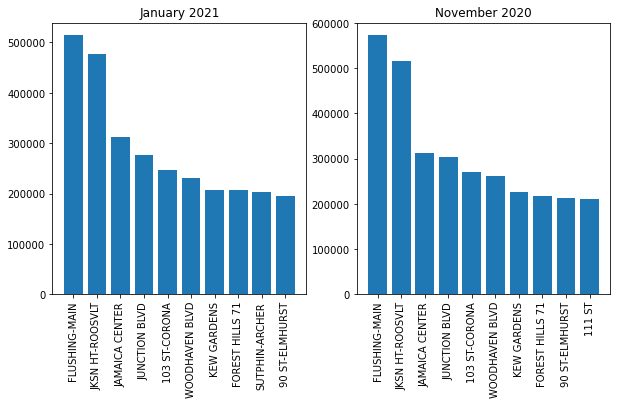

In [775]:
plt.figure(figsize=(10,5))
    
i = 1
#for monthyear, df in df_months:
monthyear, df = df_months[4]

#plt.suptitle("Queens Borough Subway Stops with the most Entries & Exits")    
plt.subplot(1,2,1)
plt.title("{}".format(monthyear))
plt.bar(x=df['STATION'][:10], height=df['MTOTAL'][:10])
plt.xticks(rotation=90)
# i += 1

monthyear, df = df_months[2]
plt.subplot(1,2,2)
plt.bar(x=df['STATION'][:10], height=df['MTOTAL'][:10])
plt.title("{}".format(monthyear))
plt.xticks(rotation=90);

plt.savefig('jan21vNov20.png')



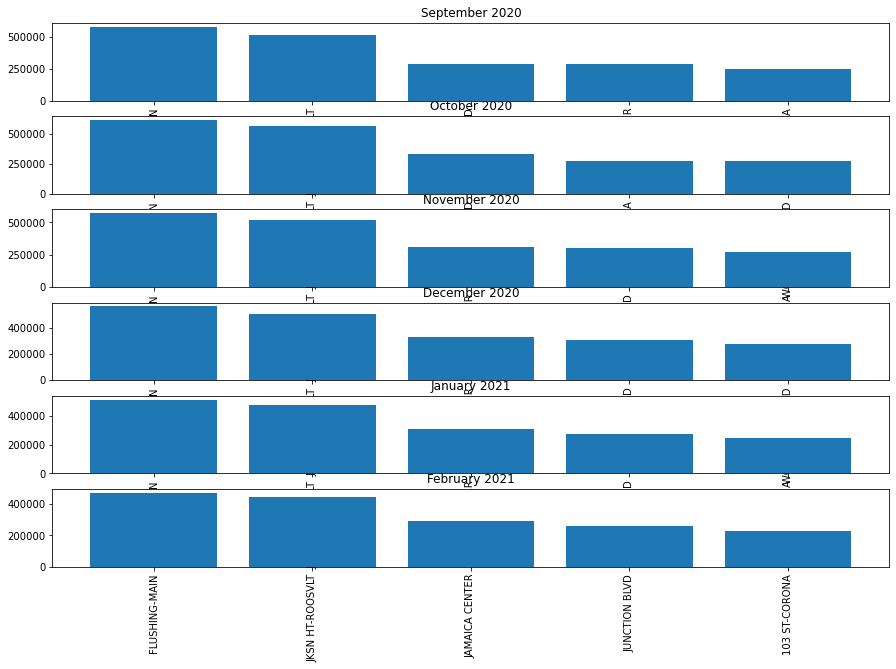

In [268]:
plt.figure(figsize=(15,10))
    
i = 1
for monthyear, df in df_months:
#     monthyear, df = df_months[4]

    #plt.suptitle("Queens Borough Subway Stops with the most Entries & Exits")    
    plt.subplot(len(df_months),1,i)

    plt.bar(x=df['STATION'][:5], height=df['MTOTAL'][:5])
    plt.title("{}".format(monthyear))
    plt.xticks(rotation=90)
    i += 1


    


In [136]:
stations.StopName = stations.StopName.str.upper()
qhv = pd.merge(station_totals, stations, left_on = 'STATION', right_on ='StopName')
qhv.sort_values('DAILY_ACTION', ascending=False)

NameError: name 'stations' is not defined

In [137]:
stations

NameError: name 'stations' is not defined

In [255]:

colors = ['blue'] * 4 + ['green'] * 16

colors

['blue',
 'blue',
 'blue',
 'blue',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green']

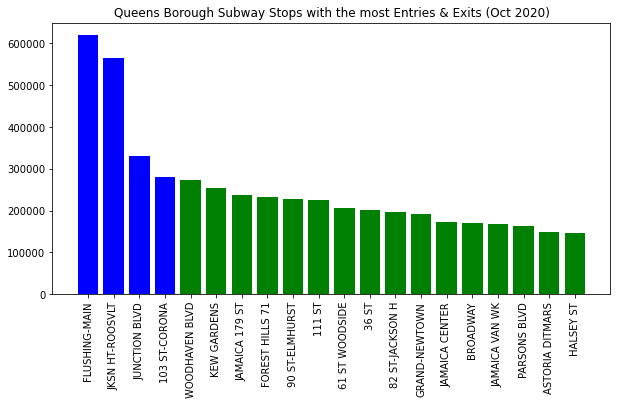

In [262]:
plt.figure(figsize=(10,5))
    
oct2020.sort_values('OCT 2020', ascending=False, inplace=True)


colors = ['blue'] * 4 + ['green'] * 16

plt.bar(x=oct2020['STATION'][:20], height=oct2020['OCT 2020'][:20], color=colors)
plt.title("Queens Borough Subway Stops with the most Entries & Exits (Oct 2020)")
plt.xticks(rotation=90)

#plt.savefig("hightraffic1-oct.png")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

<Figure size 720x360 with 0 Axes>

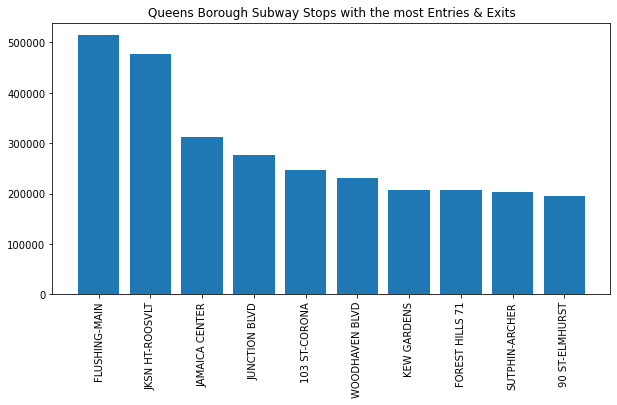

In [142]:
plt.figure(figsize=(10,5))

plt.figure(figsize=(10,5))

    
jan2021.sort_values('JAN 2021', ascending=False, inplace=True)

plt.bar(x=jan2021['STATION'][:10], height=jan2021['JAN 2021'][:10])
plt.title("Queens Borough Subway Stops with the most Entries & Exits")
plt.xticks(rotation=90)

# plt.savefig("hightraffic1.png")

#### Graph out the daily entries for various lines

In [454]:
mta_daily.describe(include = 'all')

,CA,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DAILY_EXITS,DAILY_ACTION,AVG_DAILY_ENTRIES,AVG_DAILY_EXITS
count,171105,171105,171105,171105,171105,"171,105","171,105",171105,"171,105","171,105","171,105","171,105","171,105","171,105","171,105"
unique,113,81,82,74,223,NaN,NaN,222,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,N309A,R328,00-00-01,METS-WILLETS PT,02/17/2021,NaN,NaN,02/18/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,4216,7780,17752,7780,782,NaN,NaN,782,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,"26,325,586","20,037,814",NaN,"26,337,351","20,055,472",314,303,617,361,333
std,NaN,NaN,NaN,NaN,NaN,"171,447,151","143,065,687",NaN,"171,478,795","143,161,905",373,400,678,508,447
min,NaN,NaN,NaN,NaN,NaN,0,0,NaN,0,0,0,0,0,0,0
25%,NaN,NaN,NaN,NaN,NaN,"415,359","151,101",NaN,"415,359","151,127",45,43,126,69,54
50%,NaN,NaN,NaN,NaN,NaN,"1,752,510","1,150,745",NaN,"1,753,683","1,150,967",191,158,399,216,178
75%,NaN,NaN,NaN,NaN,NaN,"6,101,856","4,126,641",NaN,"6,102,935","4,128,179",440,402,878,467,430


In [464]:
stations_daily = (mta_daily.groupby(['STATION', 'DATE'])[['DAILY_ENTRIES']]
                  .sum()
                  .reset_index())
stations_daily['DATETIME'] = pd.to_datetime(stations_daily['DATE'])
                  
stations_daily.sort_values(['DATETIME'], ascending=True, inplace=True)
# stations_daily

In [468]:
min(stations_daily.DATETIME)

Timestamp('2020-07-25 00:00:00')

In [467]:
max(stations_daily.DATETIME)

Timestamp('2021-03-05 00:00:00')

In [480]:
#Draw sample stations for time series

entries_ts = {}

rstations = np.random.choice(stations_daily.STATION.unique(),15, replace = False)

rstations_grp = np.split(rstations,3)

for name in rstations:
    temp = stations_daily[stations_daily.STATION == name]
    entries_ts[name] = temp
    
#entries_ts
rstations_grp


[array(['46 ST BLISS ST', '75 ST-ELDERTS', '36 ST', '63 DR-REGO PARK',
        'KEW GARDENS'], dtype=object),
 array(['BEACH 44 ST', '30 AV', 'AQUEDUCT RACETR', 'COURT SQ-23 ST',
        '39 AV'], dtype=object),
 array(['BEACH 98 ST', 'STEINWAY ST', '111 ST', 'HUNTERS PT AV',
        'METS-WILLETS PT'], dtype=object)]

In [481]:

def totalentriesbystation(indict,stations):
    plt.figure(figsize=(15,10))
    plt.title('Total daily entries by station', fontdict={'fontsize':20, 'fontweight':'bold', 'color':'magenta'})
    
    for name, df in indict.items():
        if name in stations:
            plt.plot(df.DATE, df.DAILY_ENTRIES, label=name)
            plt.xticks(rotation=90)

    #add vertical bars to indicate weekends    
    for i, date in enumerate(indict[name].DATE):
        if (pd.to_datetime(date)).day_of_week == 5:
            plt.axvspan(i,i+1, color = 'blue', alpha = 0.1)
    
    x = df.DATE.values
    ll =[]
    for i in x:
        if datetime.strptime(i,"%m/%d/%Y").day == 1:
            ll.append(i)
        else:
            ll.append("")
    
            
    plt.legend()
    plt.xlabel("Date")
    plt.ylabel('Entries');
    plt.xticks(ticks=df.DATE,labels=ll)


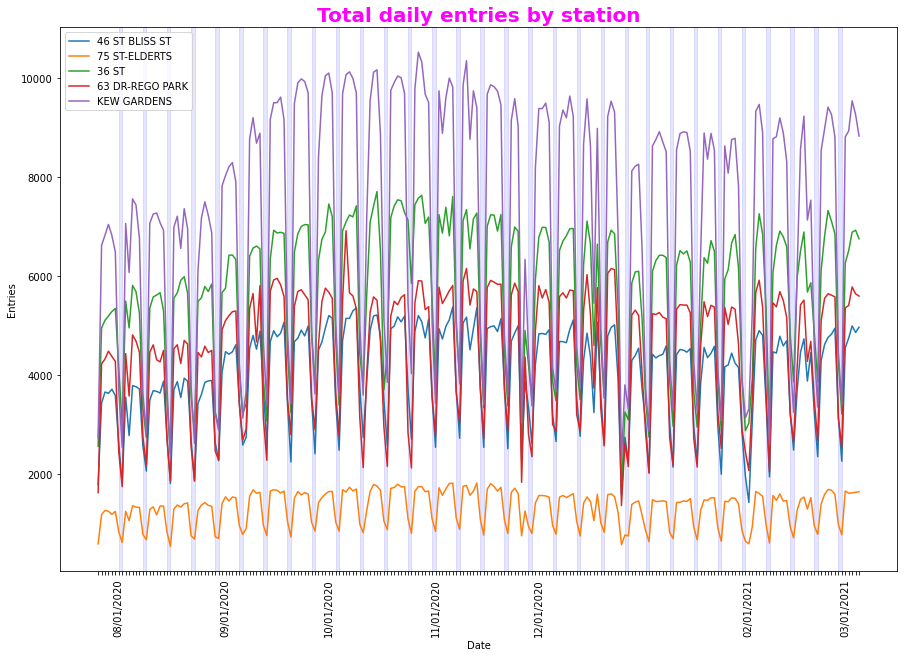

In [482]:
totalentriesbystation(entries_ts, rstations_grp[0]);

plt.savefig('totaldailybystations1.png')

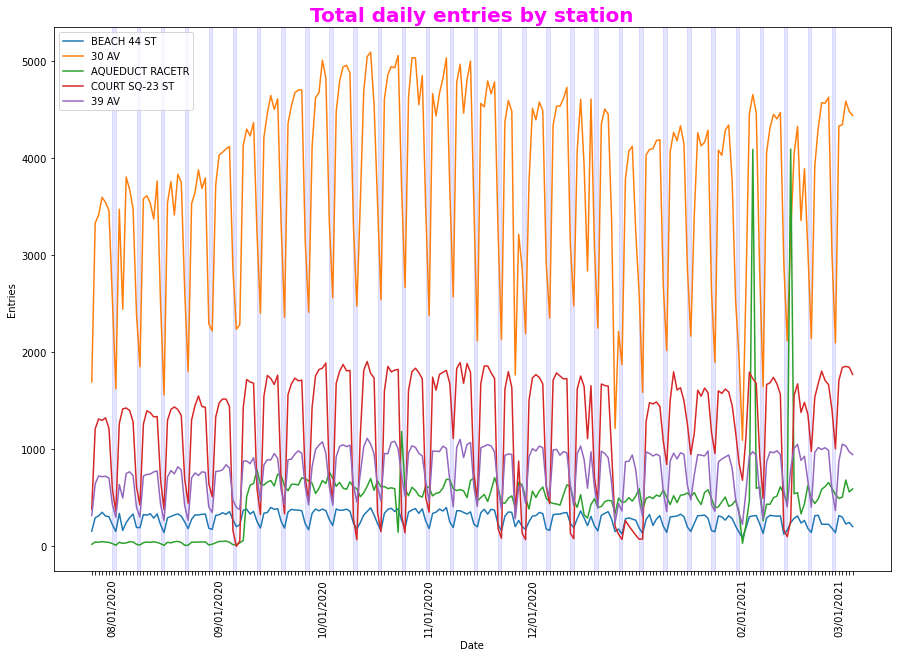

In [483]:
totalentriesbystation(entries_ts, rstations_grp[1]);

plt.savefig('totaldailybystations2.png')

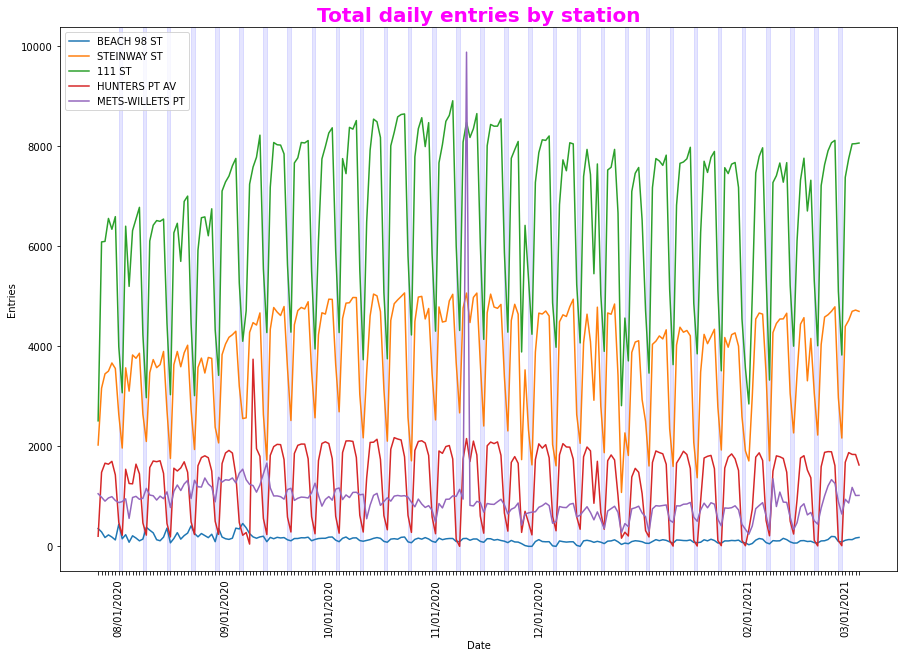

In [484]:
totalentriesbystation(entries_ts, rstations_grp[2]);

plt.savefig('totaldailybystations3.png')

## Weekly trends

* Using the mta_daily dataframe as a base, added DATETIME, WEEKYEAR, WEEKDAY to allow grouping by IsoCalendar.week adn weekday to plot weekly trends. 
* Ran for 3 sample stations

In [631]:
mta_daily.head()

,CA,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DAILY_EXITS,DAILY_ACTION,AVG_DAILY_ENTRIES,AVG_DAILY_EXITS,DATETIME,WeekYear,WEEKDAY,WEEKOFYEAR,WEEKYEAR
1,C018,R197,00-00-00,36 ST,01/02/2021,71725,112403,01/01/2021,"70,779","110,903",946,1500,2446,"1,251","1,752",2021-01-02,53,5,53,53
2,C018,R197,00-00-00,36 ST,01/03/2021,72546,113531,01/02/2021,"71,725","112,403",821,1128,1949,"1,251","1,752",2021-01-03,53,6,53,53
3,C018,R197,00-00-00,36 ST,01/04/2021,73851,115475,01/03/2021,"72,546","113,531",1305,1944,3249,"1,251","1,752",2021-01-04,1,0,1,1
4,C018,R197,00-00-00,36 ST,01/05/2021,75250,117497,01/04/2021,"73,851","115,475",1399,2022,3421,"1,251","1,752",2021-01-05,1,1,1,1
5,C018,R197,00-00-00,36 ST,01/06/2021,76587,119549,01/05/2021,"75,250","117,497",1337,2052,3389,"1,251","1,752",2021-01-06,1,2,1,1


In [534]:
mta_daily['DATETIME'] = pd.to_datetime(mta_daily['DATE'])

In [543]:
mta_daily['WEEKYEAR'] = mta_daily.DATETIME.dt.isocalendar().week

In [544]:
mta_daily['WEEKDAY'] = mta_daily.DATETIME.dt.weekday

In [624]:

def weeklygraph(mask, station):
    
    mta_year = mta_daily[mask].groupby(['STATION','WEEKOFYEAR', 'WEEKDAY'],as_index=False)[['DAILY_ENTRIES']].first()

    for i in mta_year.WEEKOFYEAR.unique():
        mask = mta_year.WEEKOFYEAR == i

        plt.title("Entries by Week - {}".format(station))

        #color and label the season
        #blue - winter, orange - fall
        seasons_c = ['blue', 'blue', 'pink', 'pink', 'pink', 'red', 'red', 'red', 'orange', 'orange', 'orange', 'blue']

        if i <= 8:
            color = 'blue'
            leg = 'winter'
        elif i <= 20:
            leg = 'spring'
            color = 'pink'
        elif i <= 32:
            color = 'red'
            leg = 'summer'
        else:
            color = 'orange'
            leg = 'fall'

        patch1 = mpatches.Patch(color='red', label='Summer')
        patch2 = mpatches.Patch(color='orange', label='Fall')
        patch3 = mpatches.Patch(color='pink', label='Spring')
        patch4 = mpatches.Patch(color='blue', label='Winter')    


        plt.plot(mta_year[mask].WEEKDAY, mta_year[mask].DAILY_ENTRIES, color=color, alpha=0.5, label=leg)

        plt.xticks(ticks = range(7), labels=['Mon','Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
        plt.xlabel("Day of Week")
       # plt.ylabel("Entries");
        plt.legend(handles=[patch1, patch2, patch3, patch4])


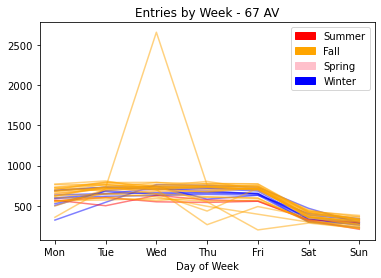

In [776]:
mask = (mta_daily.STATION == '67 AV')

weeklygraph(mask, '67 AV')
plt.savefig('weeklygraph-67th.png')

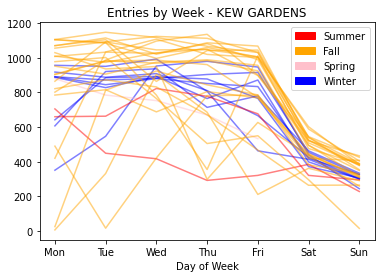

In [629]:
mask = (mta_daily.STATION == 'KEW GARDENS')

weeklygraph(mask, 'KEW GARDENS')
#plt.savefig('weeklygraph-kew.png')

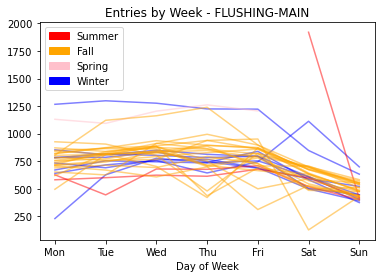

In [630]:
mask = (mta_daily.STATION == 'FLUSHING-MAIN')

weeklygraph(mask, 'FLUSHING-MAIN')
#plt.savefig('weeklygraph-flush.png')

## AM vs PM entries

Using the original mta dataframe, instead of breaking the data down by day, isolate AM and PM rushhours


In [651]:
mta.head()

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,RUSH
0,R529,R208,00-00-00,103 ST-CORONA,7,IRT,01/01/2021,03:00:00,REGULAR,16301866,25806745,IRT
1,R529,R208,00-00-00,103 ST-CORONA,7,IRT,01/01/2021,07:00:00,REGULAR,16301912,25806776,IRT
2,R529,R208,00-00-00,103 ST-CORONA,7,IRT,01/01/2021,11:00:00,REGULAR,16302069,25806888,IRT
3,R529,R208,00-00-00,103 ST-CORONA,7,IRT,01/01/2021,15:00:00,REGULAR,16302205,25807127,IRT
4,R529,R208,00-00-00,103 ST-CORONA,7,IRT,01/01/2021,19:00:00,REGULAR,16302312,25807604,IRT


In [643]:
#how many unique timeframes?  frequency?

mta.TIME.value_counts().head(25)

00:00:00    81322
04:00:00    81306
08:00:00    81248
20:00:00    81235
16:00:00    81222
12:00:00    81214
15:00:00    60518
11:00:00    60507
19:00:00    60491
03:00:00    60489
07:00:00    60487
23:00:00    60457
01:00:00    26383
17:00:00    26164
13:00:00    26164
09:00:00    26164
05:00:00    26161
21:00:00    26158
09:30:00     2500
21:30:00     2500
13:30:00     2499
17:30:00     2499
01:30:00     2495
05:30:00     2494
18:30:00     1980
Name: TIME, dtype: int64

In [663]:
def rushhour(row):
    
    if (row.DATETIME.hour >= 6) and (row.DATETIME.hour <= 10):
        output = "AM"
    elif (row.DATETIME.hour >= 16) and (row.DATETIME.hour <= 20):
        output = "PM"
    else:
        output = ""
    return output

In [664]:
mta["DATETIME"] = pd.to_datetime(mta.DATE + " " + mta.TIME)

In [665]:
mta['RUSH'] = mta.apply(rushhour, axis = 1)

In [666]:
mta.head()

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,RUSH,DATETIME
0,R529,R208,00-00-00,103 ST-CORONA,7,IRT,01/01/2021,03:00:00,REGULAR,16301866,25806745,,2021-01-01 03:00:00
1,R529,R208,00-00-00,103 ST-CORONA,7,IRT,01/01/2021,07:00:00,REGULAR,16301912,25806776,AM,2021-01-01 07:00:00
2,R529,R208,00-00-00,103 ST-CORONA,7,IRT,01/01/2021,11:00:00,REGULAR,16302069,25806888,,2021-01-01 11:00:00
3,R529,R208,00-00-00,103 ST-CORONA,7,IRT,01/01/2021,15:00:00,REGULAR,16302205,25807127,,2021-01-01 15:00:00
4,R529,R208,00-00-00,103 ST-CORONA,7,IRT,01/01/2021,19:00:00,REGULAR,16302312,25807604,PM,2021-01-01 19:00:00


In [ ]:
mta_year = mta_daily[mask].groupby(['STATION','WEEKOFYEAR', 'WEEKDAY'],as_index=False)[['DAILY_ENTRIES']].first()

### Highest individual days of activity (filtering out data errors)

In [667]:
holidays = {"01/01/2020" : "New Years",
            "01/20/2020" : "MLK Day",
            "02/12/2020" : "Lincolns Bday",
            "09/07/2020" : "Labor Day",
            "10/12/2020" : "Columbus Day",
            "11/11/2020" : "Veterans Day",
            "11/26/2020" : "Thanksgiving",
            "12/25/2020" : "Christmas Day",
            "01/01/2021" : "New Years Day",
            "01/18/2021" : "MLK Day",
            "02/12/2021" : "Lincolns Bday",
            "02/15/2021" : "Washingtons Bday"}

In [677]:
# mta_daily["HOLIDAY"] = mta_daily.apply(lambda x: holidays.get(str(x), ""), axis = 1)
mta_daily['HOLIDAY'] = mta_daily.DATE.map(holidays)

In [681]:
mta_daily.HOLIDAY.fillna("", inplace=True)

In [683]:
mta_daily.head()

,CA,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,...,DAILY_EXITS,DAILY_ACTION,AVG_DAILY_ENTRIES,AVG_DAILY_EXITS,DATETIME,WeekYear,WEEKDAY,WEEKOFYEAR,WEEKYEAR,HOLIDAY
1,C018,R197,00-00-00,36 ST,01/02/2021,71725,112403,01/01/2021,"70,779","110,903",...,1500,2446,"1,251","1,752",2021-01-02,53,5,53,53,
2,C018,R197,00-00-00,36 ST,01/03/2021,72546,113531,01/02/2021,"71,725","112,403",...,1128,1949,"1,251","1,752",2021-01-03,53,6,53,53,
3,C018,R197,00-00-00,36 ST,01/04/2021,73851,115475,01/03/2021,"72,546","113,531",...,1944,3249,"1,251","1,752",2021-01-04,1,0,1,1,
4,C018,R197,00-00-00,36 ST,01/05/2021,75250,117497,01/04/2021,"73,851","115,475",...,2022,3421,"1,251","1,752",2021-01-05,1,1,1,1,
5,C018,R197,00-00-00,36 ST,01/06/2021,76587,119549,01/05/2021,"75,250","117,497",...,2052,3389,"1,251","1,752",2021-01-06,1,2,1,1,


In [692]:
mta_daily.sort_values('DAILY_ENTRIES', ascending=False, inplace=True)
mta_daily['RANK'] = mta_daily.ENTRIES.rank()

In [777]:
mta_daily.head(10)

,CA,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,...,DAILY_ACTION,AVG_DAILY_ENTRIES,AVG_DAILY_EXITS,DATETIME,WeekYear,WEEKDAY,WEEKOFYEAR,WEEKYEAR,HOLIDAY,RANK
33690,N192,R336,00-00-01,BEACH 60 ST,11/16/2020,35,10,11/15/2020,"12,387","16,374",...,12629,260,203,2020-11-16,47,0,47,47,,"6,774"
168394,R533,R055,00-00-05,FLUSHING-MAIN,09/12/2020,273,551,09/11/2020,"658,533","7,695",...,7316,463,966,2020-09-12,37,5,37,37,,"7,948"
168385,R533,R055,00-00-05,FLUSHING-MAIN,09/03/2020,655577,604,09/02/2020,"10,696,562","15,011,153",...,6927,463,966,2020-09-03,36,3,36,36,,"55,202"
167109,R532H,R328,02-06-01,METS-WILLETS PT,11/10/2020,589824,4,11/09/2020,"33,256","345,441",...,7712,42,27,2020-11-10,46,1,46,46,,"51,714"
166990,R532H,R328,02-06-00,METS-WILLETS PT,11/10/2020,524288,0,11/09/2020,"41,929","338,430",...,7019,38,26,2020-11-10,46,1,46,46,,"48,789"
24157,N181A,R464,00-05-00,AQUEDUCT RACETR,02/15/2021,0,0,02/10/2021,"393,218",0,...,3614,33,0,2021-02-15,7,0,7,7,Washingtons Bday,"1,568"
24150,N181A,R464,00-05-00,AQUEDUCT RACETR,02/04/2021,393218,0,02/02/2021,"1,990",0,...,3614,33,0,2021-02-04,5,3,5,5,,"41,650"
33701,N192,R336,00-00-01,BEACH 60 ST,11/27/2020,721042,140,11/26/2020,343,395,...,3850,260,203,2020-11-27,48,4,48,48,,"58,615"
42757,N309A,R140,00-03-02,QUEENS PLAZA,10/29/2020,72,41,10/28/2020,"760,851","556,367",...,6067,91,71,2020-10-29,44,3,44,44,,"6,860"
2135,H028,R266,00-06-00,HALSEY ST,09/18/2020,590069,47,09/17/2020,"1,906,617","89,551",...,3840,686,111,2020-09-18,38,4,38,38,,"51,952"


In [726]:
holidaydf = (mta_daily
 .groupby(['HOLIDAY'])['DAILY_ENTRIES'].mean()
 .reset_index())

holidaydf.rename(columns = {"DAILY_ENTRIES" : "AVG_DAILY_ENTRIES", 
                            "HOLIDAY":"FEDERAL HOLIDAY"},
                 inplace=True)
holidaydf.loc[holidaydf["FEDERAL HOLIDAY"] == "", "FEDERAL HOLIDAY"] = "**REGULAR**"

holidaydf.sort_values(["AVG_DAILY_ENTRIES"], inplace=True)

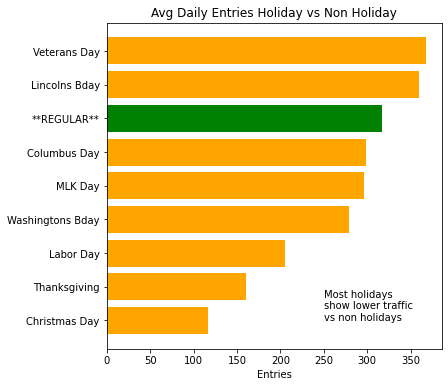

In [748]:
plt.figure(figsize=(6,6))
plt.title("Avg Daily Entries Holiday vs Non Holiday")
plt.xlabel("Entries")
#plt.ylabel("Federal Holiday")
colors = ['orange'] * 6 + ['green'] + ['orange'] * 2
plt.annotate("Most holidays \nshow lower traffic \nvs non holidays", (250,0))
plt.barh(holidaydf["FEDERAL HOLIDAY"], holidaydf.AVG_DAILY_ENTRIES, color = colors)
#plt.savefig('holidayimpact.png')